# Chloe Ting Data Exploration

Data collected using `data-collection-chrome-extension` were exported to CSV file.
This data is from https://www.youtube.com/watch?v=2pLT-olgUJs

This is a very long data exploration to determine which features are the best for training a neural network. A more comprehensive version can be found at `Chloe Ting Audio Analysis`

## Set up plot function for feature that has array values

Each plot corresponds to the index of the array. Eg. First subplot of MFCC corresponds to first MFCC coeffient.

Area shaded in pink shows when Chloe is speaking. Non-shaded area is when background music is playing.

In [21]:
from CONSTANTS import CLASS_NAMES, CLASS_TO_INT, FEATURES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_filepath = './data/2020-07-26_06-35-07.csv'
df = pd.read_csv(csv_filepath, sep=',', header=0)

# Get dataframes for time and label
time = df['timestamp'] 
label = df['class']

def get_padding(min_val, max_val):
    return abs(min_val - max_val) * 0.05

def plotFeatureArray(sub_part, divide_factor, start, end, feature_name):
    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)
    sample = []
    
    for i in range(start, end + 1, 1):
        sample.append(df[feature_name + '_' + str(i)])

    n_plots = end - start + 1
    fig, ax = plt.subplots(n_plots, 1, figsize=(15, n_plots * 4))

    # Hack to turn single plot axis into numpy array similar to when having many plots
    if not isinstance(ax, np.ndarray):
        ax = [ax]

    for i in range(len(sample)):
        # Divide sample into smaller chunks
        sample_split = np.array_split(sample[i], divide_factor)

        min_val = np.amin(sample_split[sub_part - 1])
        max_val = np.amax(sample_split[sub_part - 1])
        padding = get_padding(min_val, max_val)
        ylim = [ min_val - padding, max_val + padding]

        ax[i].set_ylim(ylim)
        ax[i].set_title(feature_name + '_' + str(start + i))
        ax[i].plot(time_split[sub_part - 1], sample_split[sub_part - 1])
        ax[i].fill_between(
            time_split[sub_part - 1],
            ylim[0], ylim[1],
            where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
            color='lightcoral', alpha=0.2)

    # Show plot
    plt.show()

## Power Spectrum

Chrome extension is used to collect audio data from Youtube video. Sampling rate that was used was `48000 Hz`. When perform FFT, the result frequency range will be from 0 to half of sampling rate, which `24000 Hz`. The buffer size is `1024`, hence, there are `512` bins. Therefore, each bin has the range of `24000/512 = 46.875 Hz`.

### Analysis
- Human vocal ranges from about 100~300Hz, which is bin #3-7
- Music can ranges from 50Hz to 4000Hz or more
- Timer beep should be about 1000Hz and 2000Hz

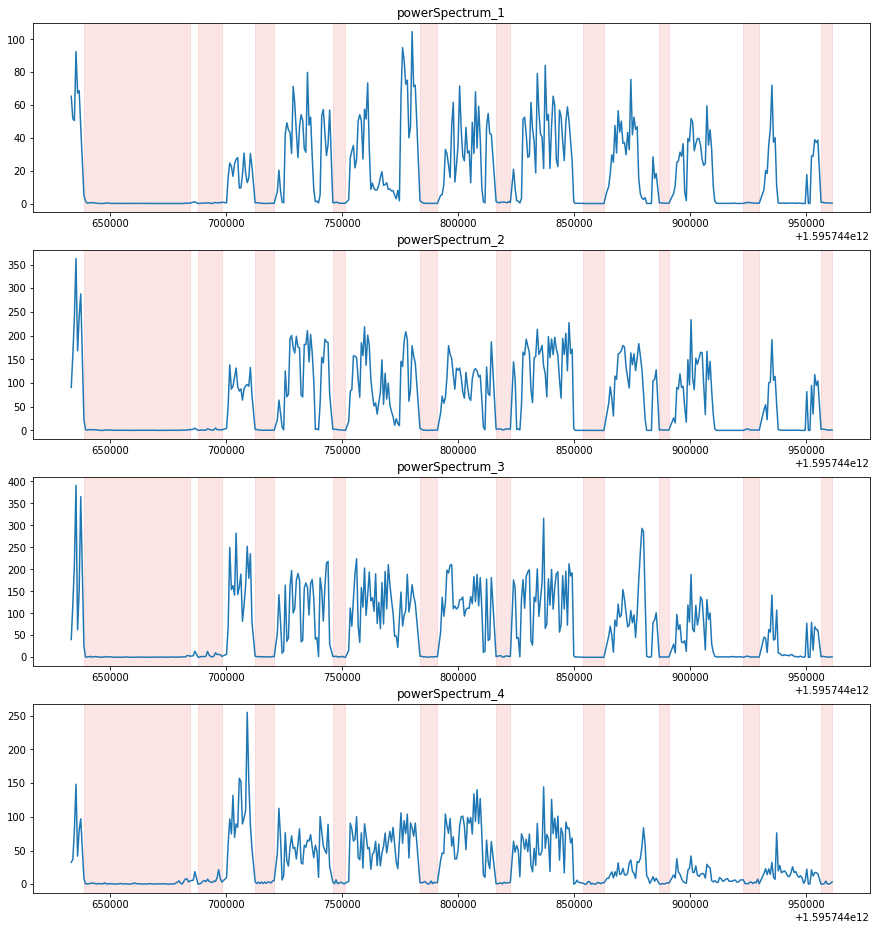

In [2]:
PS_DIVIDE_FACTOR = 2
PS_PART = 1
start_bin = 1
end_bin = 4
plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

- Look at bin 6 and 7, they should be about 200-280Hz, which should be the frequency of Chloe's voice
- We can see peaks in the shaded region. However, the background music in the non-shaded region also contains frequencies signature in that range.

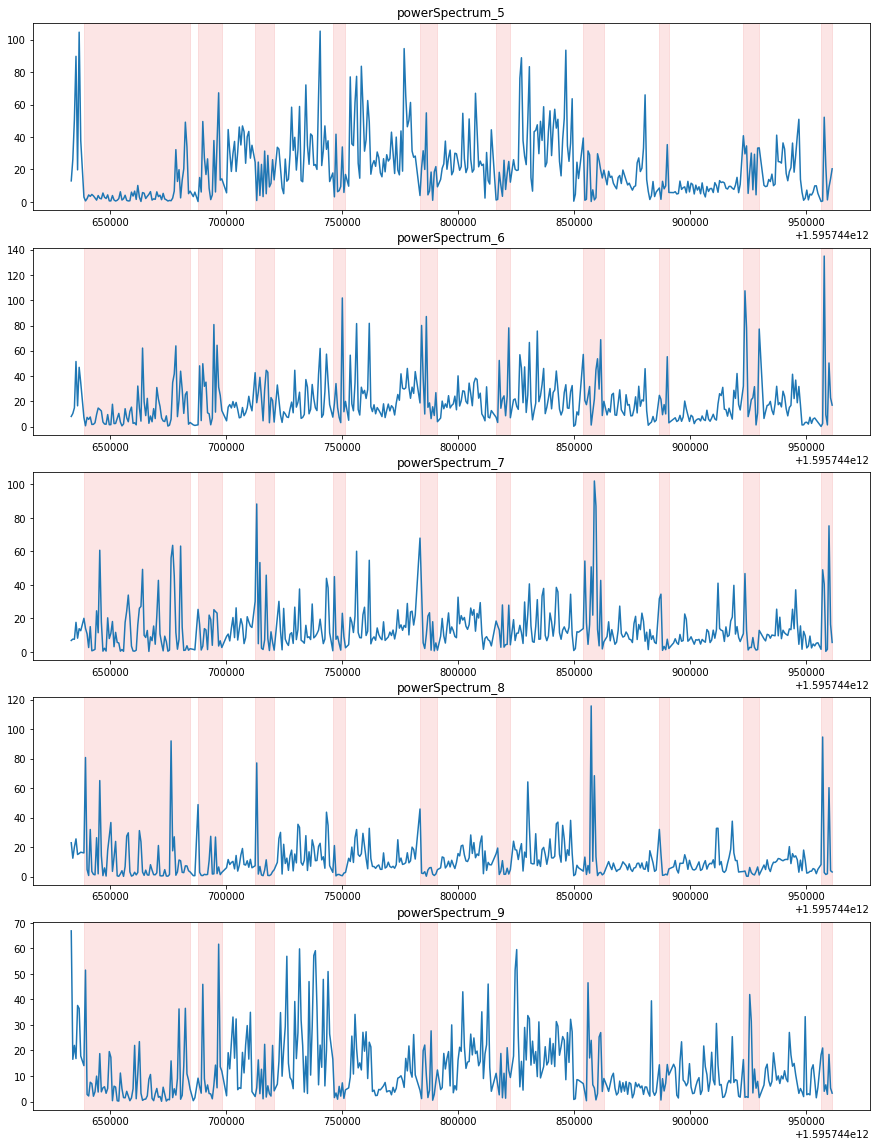

In [3]:
PS_DIVIDE_FACTOR = 2
PS_PART = 1
start_bin = 5
end_bin = 9

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

- Bin 10 to 11 show clear peaks in the shaded region. Not too sure what's the peak at 500Hz

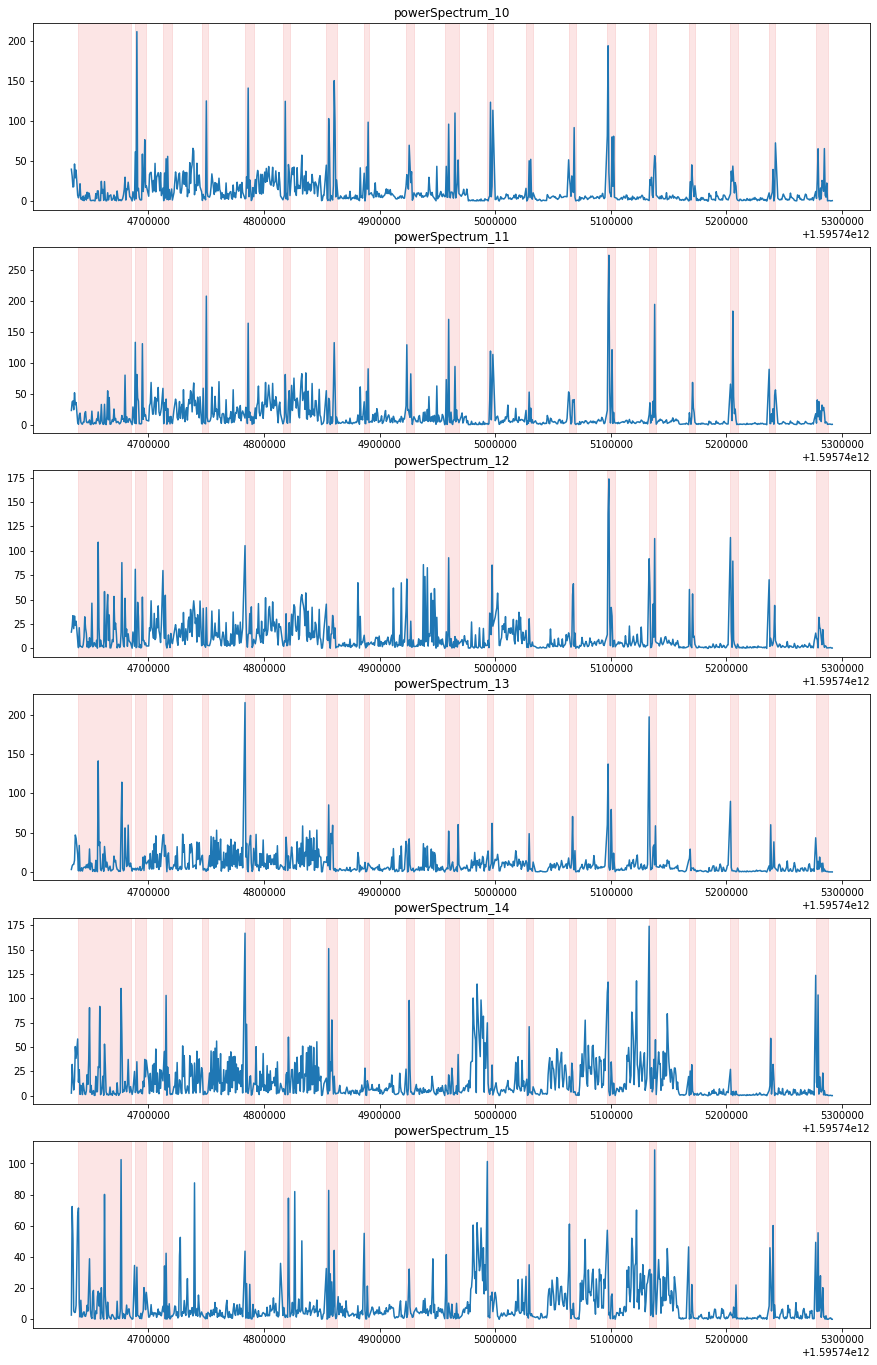

In [4]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 10
end_bin = 15

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

- Bin 22 to 23 corresponds to frequency at around 1000Hz, which is the timer's beep

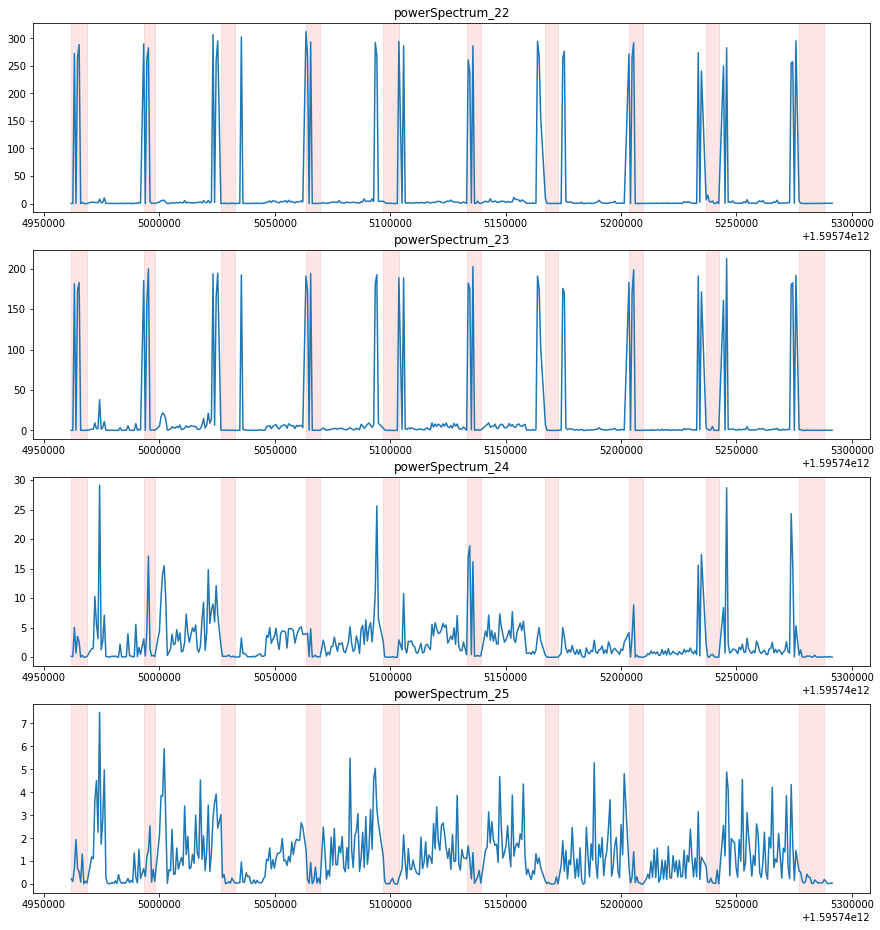

In [5]:
PS_DIVIDE_FACTOR = 2
PS_PART = 2
start_bin = 22
end_bin = 25

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

- Bin 40 t0 41 should be music mid-range frequencies such as saws, melody, instrument

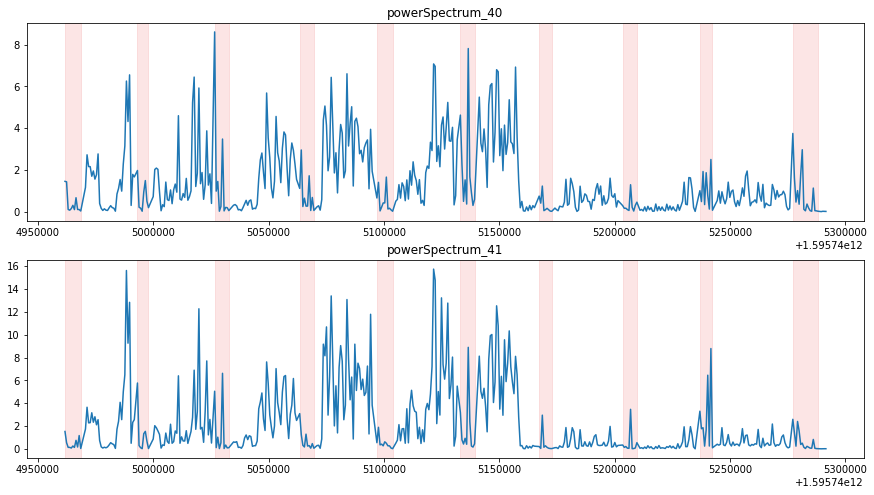

In [6]:
PS_DIVIDE_FACTOR = 2
PS_PART = 2
start_bin = 40
end_bin = 41

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

- Bin 43 to 45 shows clear peaks around 2000-2200Hz, this should be the last timer beep that has higher pitch

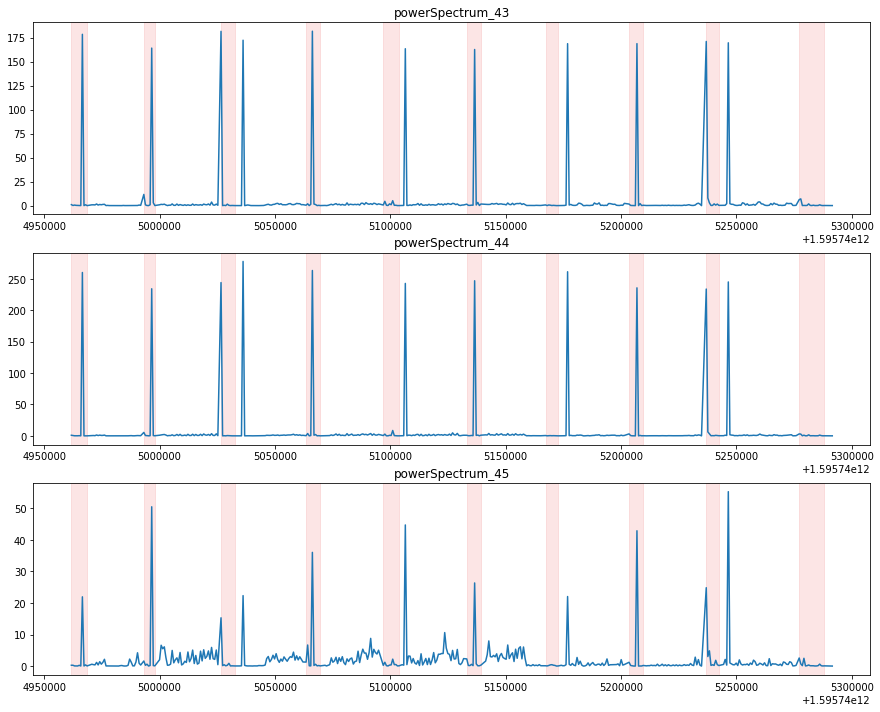

In [7]:
PS_DIVIDE_FACTOR = 2
PS_PART = 2
start_bin = 43
end_bin = 45

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

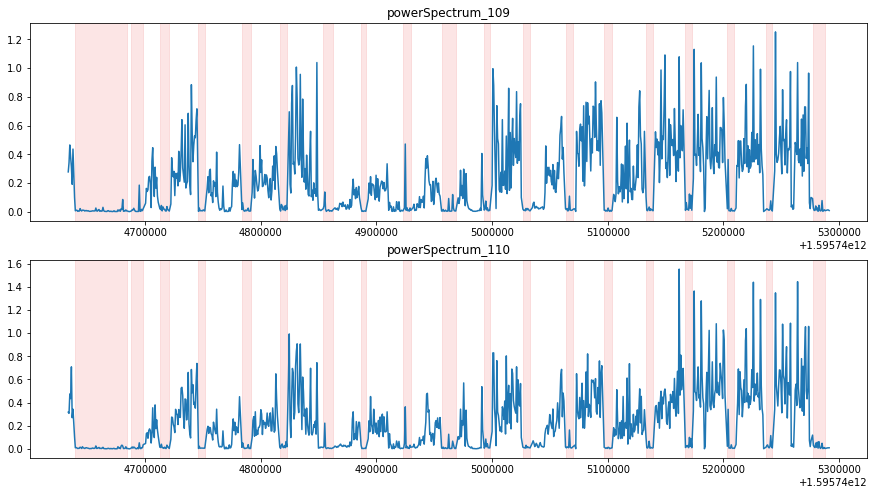

In [8]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 109
end_bin = 110

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

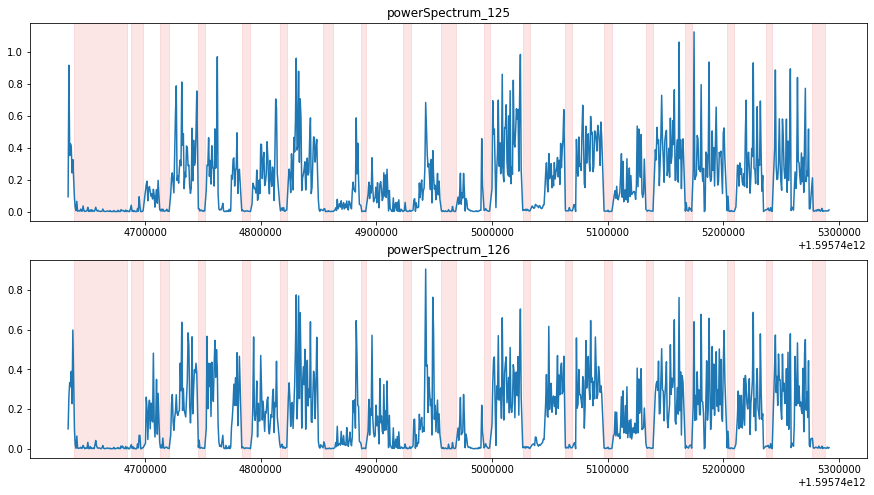

In [9]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 125
end_bin = 126

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

## MFCC

From the first 13 coefficients, the 1st and 10th seems to have clear distinction between shaded and non-shaded area. However, this is from jsut one video. But for now, I'll just use those as features to train.

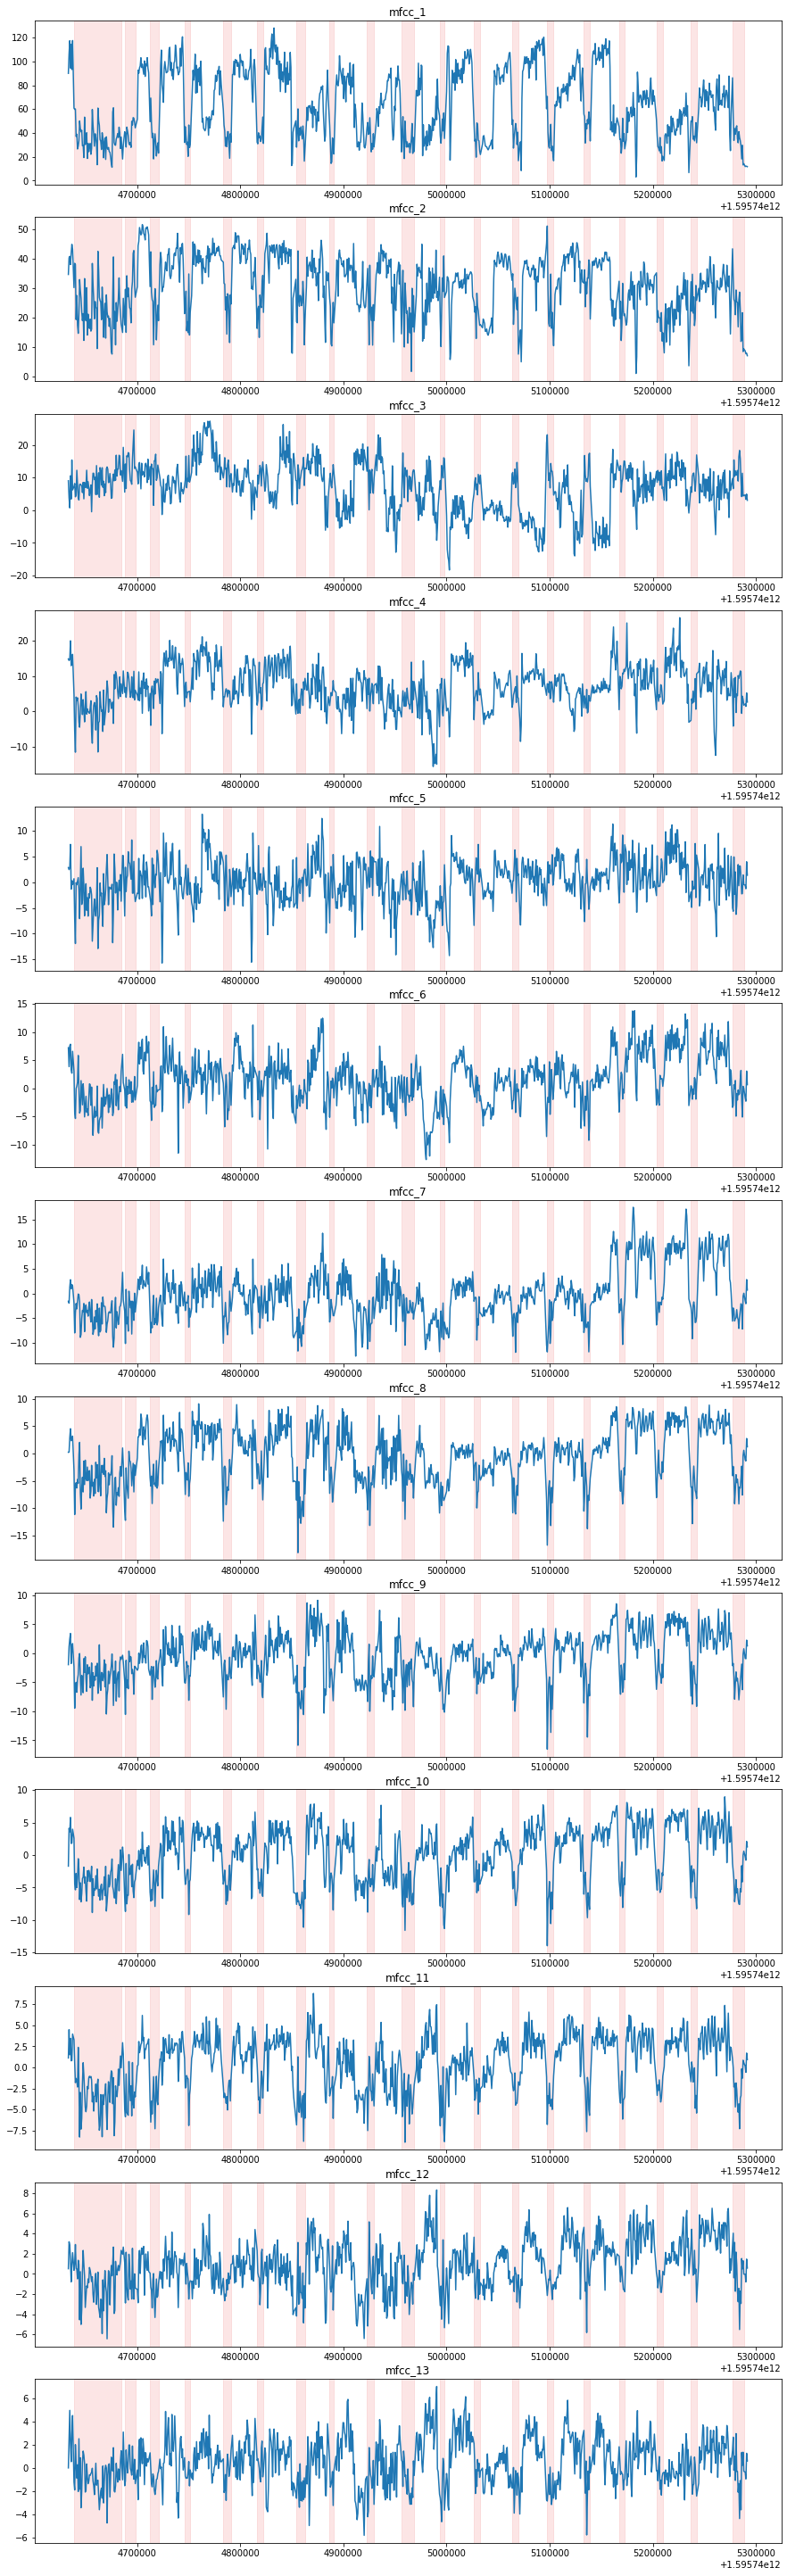

In [10]:
MFCC_DIVIDE_FACTOR = 1
MFCC_PART = 1
first_mfcc = 1
last_mfcc = 13

plotFeatureArray(MFCC_PART, MFCC_DIVIDE_FACTOR, first_mfcc, last_mfcc, FEATURES['MFCC'])

## Set up plot function for single-value feature

Ploting value of a feature and its different between value from previous sample.

Area shaded in pink shows when Chloe is speaking. Non-shaded area is when background music is playing.

In [23]:
# Plot feature value and its difference between neighboring values
def plotFeature(sub_part, divide_factor, feature, delta, feature_name):
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)

    feature_split = np.array_split(feature, divide_factor)
    delta_split = np.array_split(delta, divide_factor)

    # Plot feature values
    min_val = np.amin(feature_split[sub_part - 1])
    max_val = np.amax(feature_split[sub_part - 1])
    padding = get_padding(min_val, max_val)
    ylim_1 = [ (min_val - padding), (max_val + padding)]
    ax[0].set_title(feature_name)
    ax[0].set_ylim(ylim_1)
    ax[0].plot(time_split[sub_part - 1], feature_split[sub_part - 1], color='dodgerblue')
    ax[0].fill_between(
        time_split[sub_part - 1],
        ylim_1[0], ylim_1[1],
        where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Delta (max diff between current and previous 2 values)
    min_val = np.amin(delta_split[sub_part - 1])
    max_val = np.amax(delta_split[sub_part - 1])
    ylim_2 = [ min_val - padding, max_val + padding]
    ax[1].set_title('Delta ' + feature_name)
    ax[1].set_ylim(ylim_2)
    ax[1].plot(time_split[sub_part - 1], delta_split[sub_part - 1], color='darkorange')
    ax[1].fill_between(
        time_split[sub_part - 1],
        ylim_2[0], ylim_2[1],
        where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Show plot
    plt.show()

## RMS

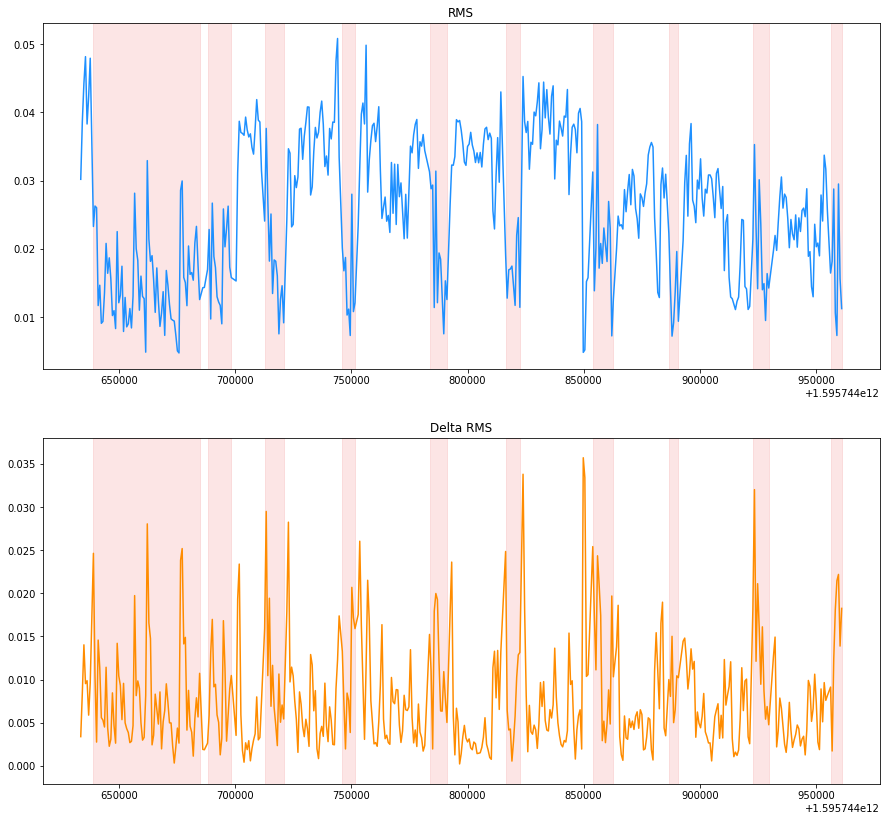

In [24]:
RMS_DIVIDE_FACTOR = 2
RMS_PART = 1
rms = df[FEATURES['RMS']]
delta_rms = df[FEATURES['DELTA_RMS']]

plotFeature(RMS_PART, RMS_DIVIDE_FACTOR, rms, delta_rms, 'RMS')

## Energy

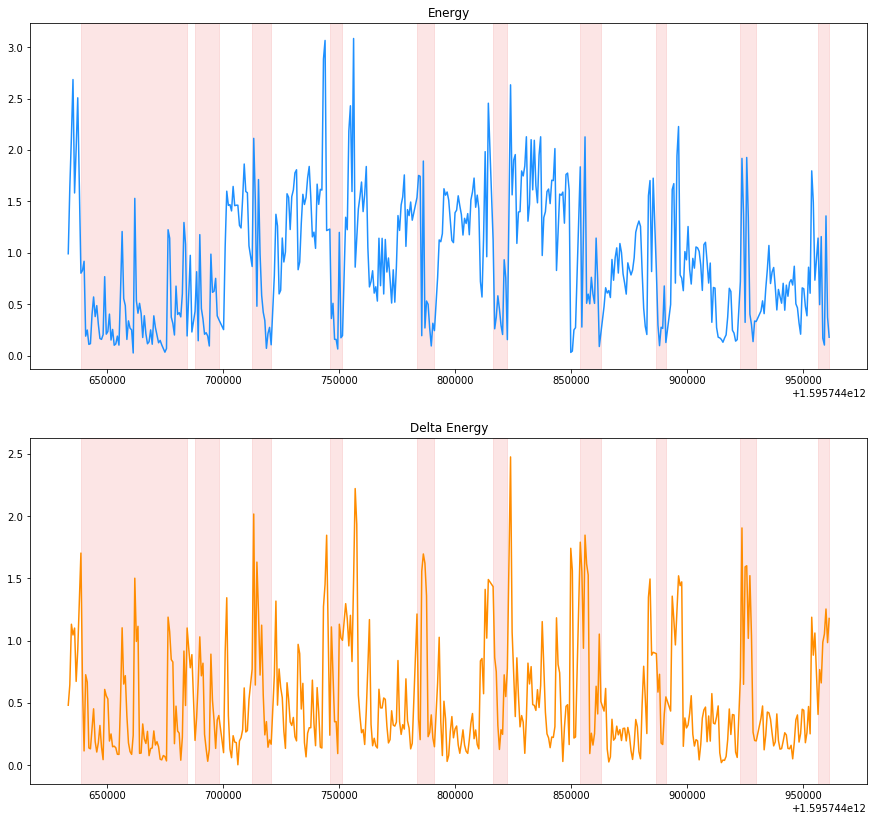

In [25]:
ENERGY_DIVIDE_FACTOR = 2
ENERGY_PART = 1
energy = df[FEATURES['ENERGY']]
delta_energy = df[FEATURES['DELTA_ENERGY']]

plotFeature(ENERGY_PART, ENERGY_DIVIDE_FACTOR, energy, delta_energy, 'Energy')

## Spectral Centroid

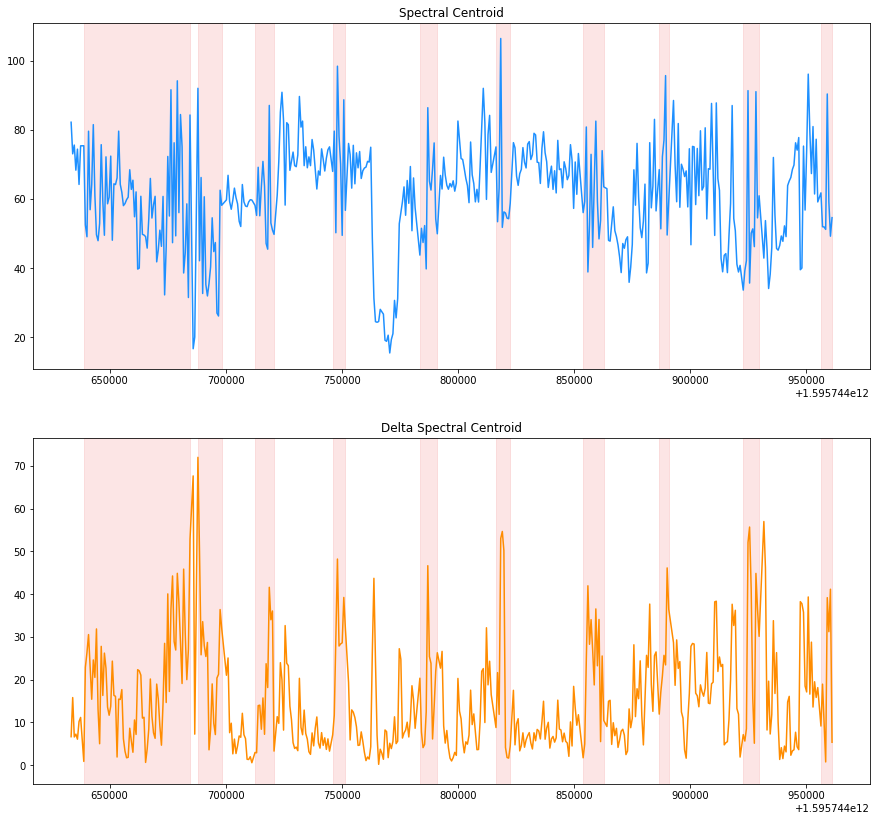

In [26]:
SP_CENTROID_DIVIDE_FACTOR = 2
SP_CENTROID_PART = 1
sp_centriod = df[FEATURES['SPECTRAL_CENTROID']]
delta_sp_centriod = df[FEATURES['DELTA_SPECTRAL_CENTROID']]

plotFeature(SP_CENTROID_PART, SP_CENTROID_DIVIDE_FACTOR, sp_centriod, delta_sp_centriod, 'Spectral Centroid')

## Spectral Flatness

This seems to be the clearest among the single-value features. Variation of Chloe's voice causes variation in frequencies. Should be able to use just the value itself without the need to include delta values.

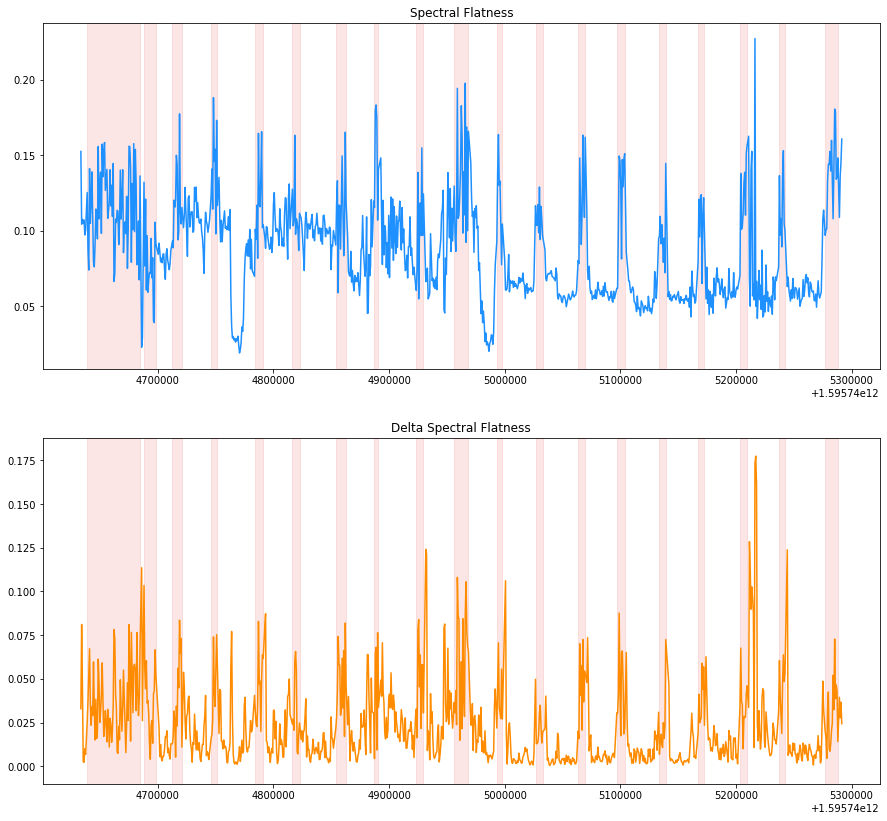

In [27]:
SP_FLATNESS_DIVIDE_FACTOR = 1
SP_FLATNESS_PART = 1
sp_flatness = df[FEATURES['SPECTRAL_FLATNESS']]
delta_sp_flatness = df[FEATURES['DELTA_SPECTRAL_FLATNESS']]

plotFeature(SP_FLATNESS_PART, SP_FLATNESS_DIVIDE_FACTOR, sp_flatness, delta_sp_flatness, 'Spectral Flatness')

## Spectral Rolloff

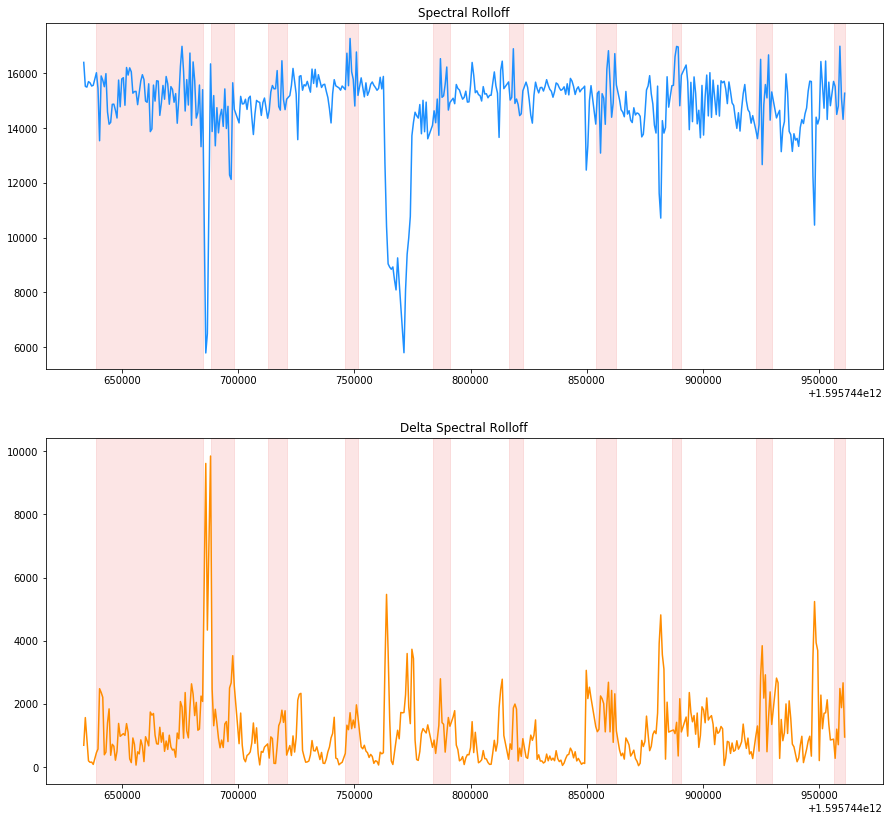

In [28]:
SP_ROLLOFF_DIVIDE_FACTOR = 2
SP_ROLLOFF_PART = 1
sp_rolloff = df[FEATURES['SPECTRAL_ROLLOFF']]
delta_sp_rolloff = df[FEATURES['DELTA_SPECTRAL_ROLLOFF']]

plotFeature(SP_ROLLOFF_PART, SP_ROLLOFF_DIVIDE_FACTOR, sp_rolloff, delta_sp_rolloff, 'Spectral Rolloff')

## Spectral Skewness

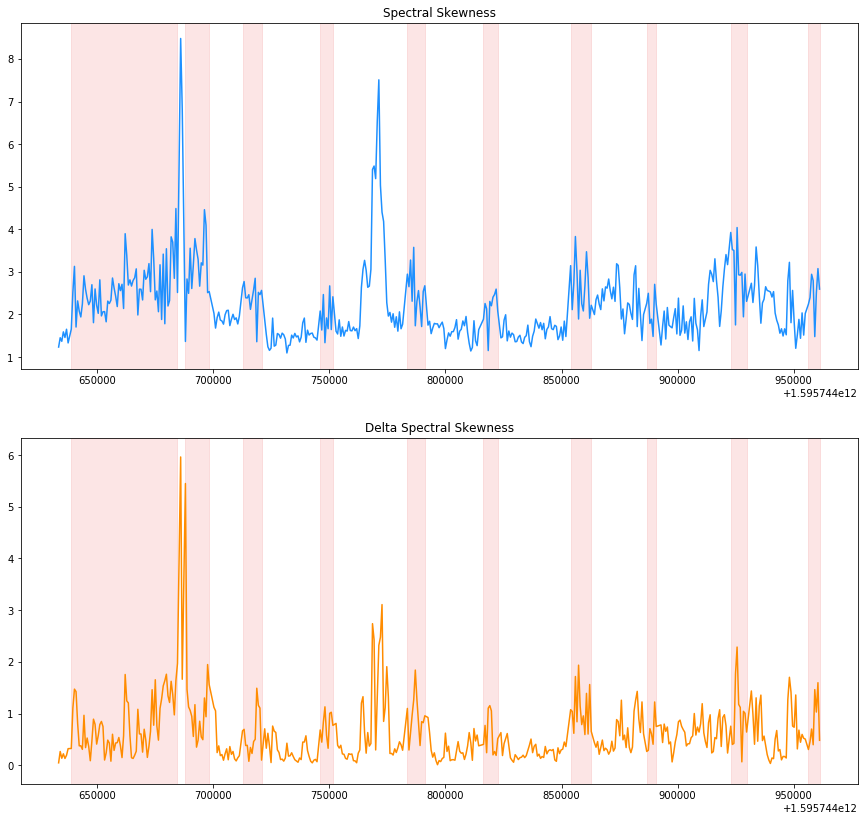

In [29]:
SP_SKEWNESS_DIVIDE_FACTOR = 2
SP_SKEWNESS_PART = 1
sp_skewness = df[FEATURES['SPECTRAL_SKEWNESS']]
delta_sp_skewness = df[FEATURES['DELTA_SPECTRAL_SKEWNESS']]

plotFeature(SP_SKEWNESS_PART, SP_SKEWNESS_DIVIDE_FACTOR, sp_skewness, delta_sp_skewness, 'Spectral Skewness')

##  Perceptual Spread

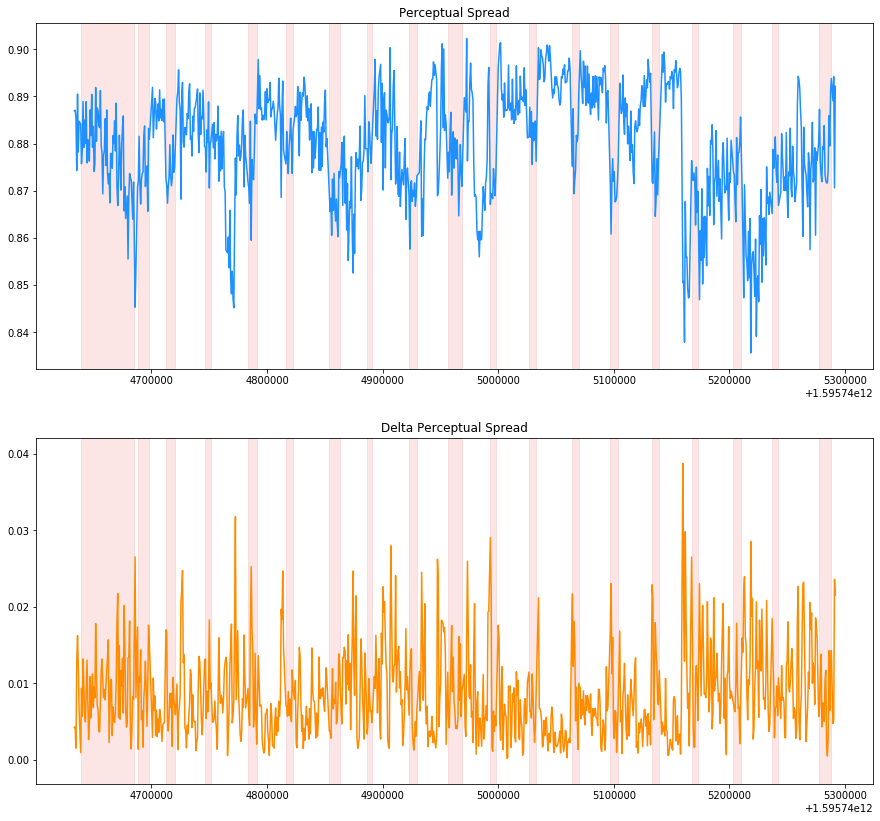

In [30]:
PC_SPREAD_DIVIDE_FACTOR = 1
PC_SPREAD_PART = 1
pc_spread = df[FEATURES['PERCEPTUAL_SPREAD']]
delta_pc_spread = df[FEATURES['DELTA_PERCEPTUAL_SPREAD']]

plotFeature(PC_SPREAD_PART, PC_SPREAD_DIVIDE_FACTOR, pc_spread, delta_pc_spread, 'Perceptual Spread')

## Perceptual Sharpness

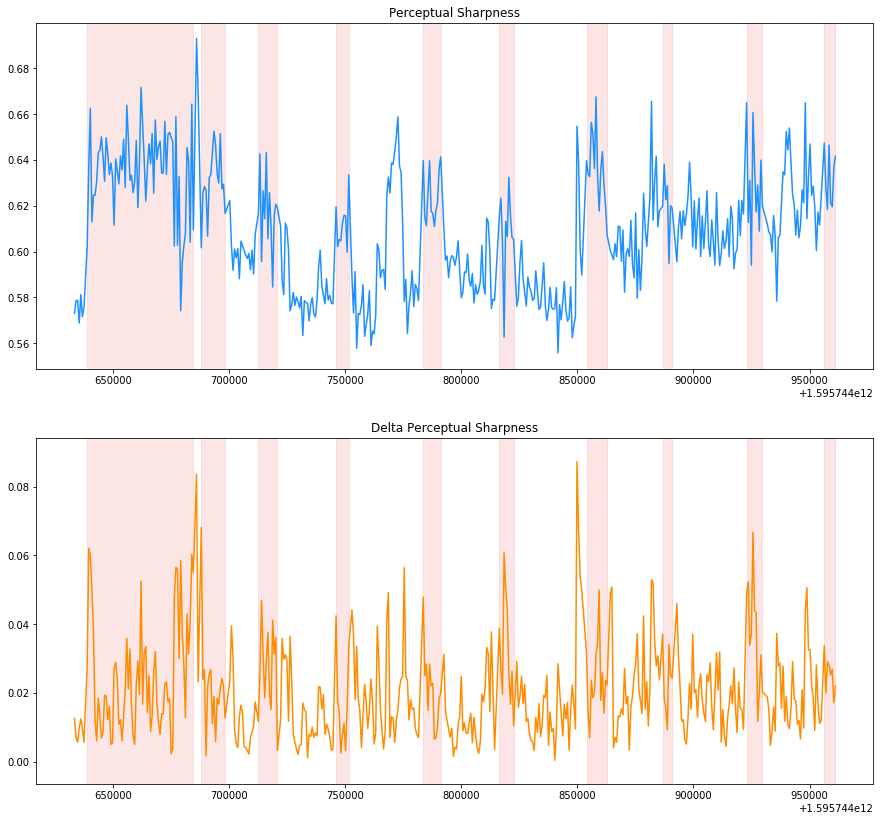

In [31]:
PC_SHARPNESS_DIVIDE_FACTOR = 2
PC_SHARPNESS_PART = 1
pc_sharpness = df[FEATURES['PERCEPTUAL_SHARPNESS']]
delta_pc_sharpness = df[FEATURES['DELTA_PERCEPTUAL_SHARPNESS']]

plotFeature(PC_SHARPNESS_PART, PC_SHARPNESS_DIVIDE_FACTOR, pc_sharpness, delta_pc_sharpness, 'Perceptual Sharpness')